In [1]:
import pandas as pd

# 假设文件名为data.txt，先读取数据
data = pd.read_csv('score.txt', header=None)

# 显示前几行数据查看格式
print(data.head())


     0       1        2      3       4   5    6   7   8   9   10  11
0  2023  125200     公共管理  专业型硕士  上海海洋大学 NaN  175  44   0  88   0 NaN
1  2023  095137     农业管理  专业型硕士  上海海洋大学 NaN  251  33  33  50  50 NaN
2  2023  095135  食品加工与安全  专业型硕士  上海海洋大学 NaN  251  33  33  50  50 NaN
3  2023  095134     渔业发展  专业型硕士  上海海洋大学 NaN  251  33  33  50  50 NaN
4  2023  086000    生物与医药  专业型硕士  上海海洋大学 NaN  273  38  38  57  57 NaN


In [3]:
# 为数据添加列名
columns = ['Year', 'Code', 'Major', 'DegreeType', 'School', 'Unknown', 'Score1', 'Score2', 'Score3', 'Score4', 'Score5','']
data.columns = columns

# 删除 'Unknown' 列，因为没有实际意义
data = data.drop(columns=['Unknown'])

# 查看处理后的数据
print(data.head())


   Year    Code    Major DegreeType  School  Score1  Score2  Score3  Score4  \
0  2023  125200     公共管理      专业型硕士  上海海洋大学     175      44       0      88   
1  2023  095137     农业管理      专业型硕士  上海海洋大学     251      33      33      50   
2  2023  095135  食品加工与安全      专业型硕士  上海海洋大学     251      33      33      50   
3  2023  095134     渔业发展      专业型硕士  上海海洋大学     251      33      33      50   
4  2023  086000    生物与医药      专业型硕士  上海海洋大学     273      38      38      57   

   Score5      
0       0 NaN  
1      50 NaN  
2      50 NaN  
3      50 NaN  
4      57 NaN  


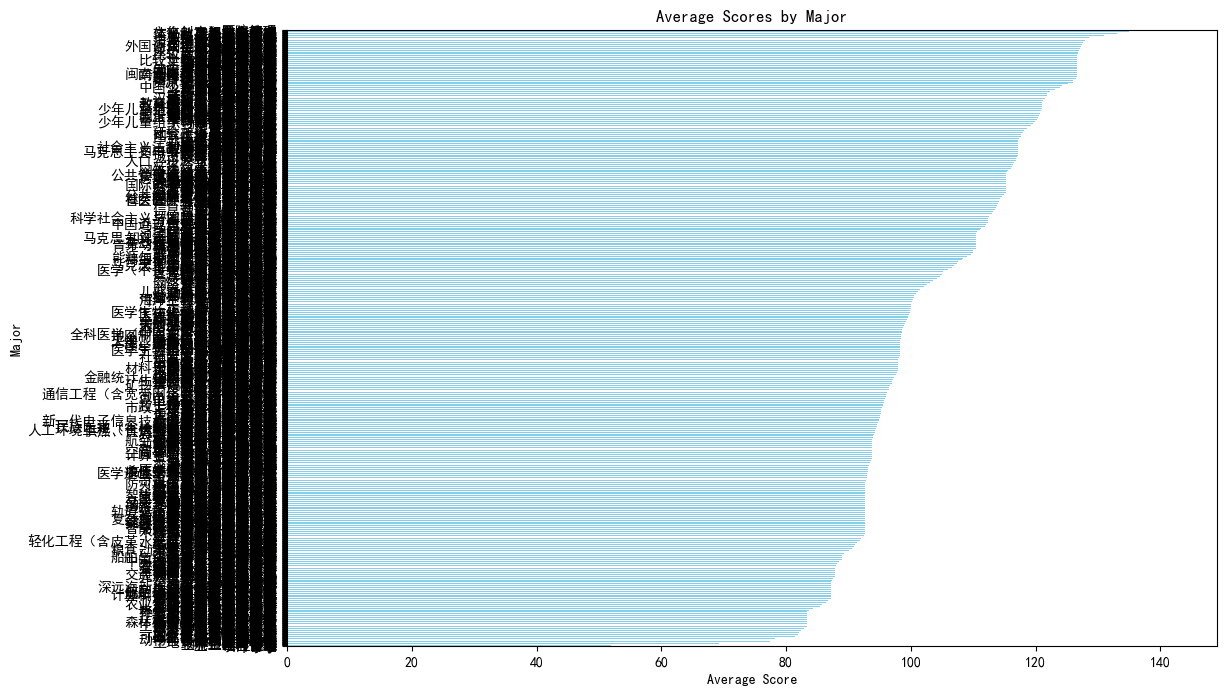

In [5]:
import matplotlib.pyplot as plt
import matplotlib
# 设置matplotlib使用SimHei字体，解决中文显示问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算每个学科的平均成绩
data['AverageScore'] = data[['Score1', 'Score2', 'Score3', 'Score4', 'Score5']].mean(axis=1)

# 按学科计算平均分
average_scores = data.groupby('Major')['AverageScore'].mean()

# 绘制柱状图
plt.figure(figsize=(12, 8))
average_scores.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Scores by Major')
plt.xlabel('Average Score')
plt.ylabel('Major')
plt.show()
